### Importing Modules

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as ttp
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Datasets and assigning target values/classes

In [64]:
true_df = pd.read_csv('True.csv')
true_df['class'] = 1
fake_df = pd.read_csv('Fake.csv')
fake_df['class'] = 0

In [65]:
true_df.head(3)

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1


In [66]:
fake_df.head(3)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0


In [67]:
true_df.shape, fake_df.shape

((21417, 5), (23481, 5))

### Taking last 10 as validation data

In [68]:
true_df_validation = true_df.tail(10)
true_df.drop(true_df.index[list(range(true_df.shape[0]-10, true_df.shape[0]))], inplace=True)
fake_df_validation = fake_df.tail(10)
fake_df.drop(fake_df.index[list(range(fake_df.shape[0]-10, fake_df.shape[0]))], inplace=True)

### Merging both validation datasets

In [69]:
validation_df = pd.concat([true_df_validation, fake_df_validation], axis=0)
merged_df = pd.concat([fake_df, true_df], axis=0)
validation_df.to_csv("Validation.csv")

### Visualizing the Dataset

subject
Government News     1570
Middle-east          768
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


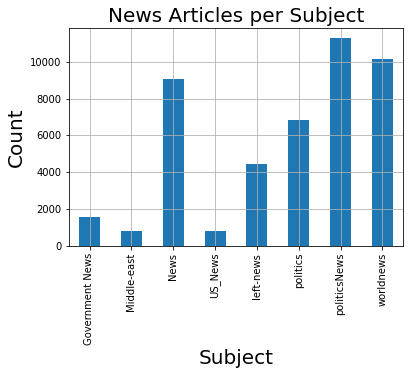

In [70]:
print(merged_df.groupby(['subject'])['text'].count())
merged_df.groupby(['subject'])['text'].count().plot(kind="bar")
plt.title('News Articles per Subject', size=20)
plt.xlabel('Subject', size=20)
plt.ylabel('Count', size=20)
plt.grid()
plt.show()

class
0    23471
1    21407
Name: text, dtype: int64


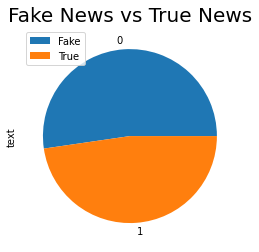

In [71]:
print(merged_df.groupby(['class'])['text'].count())
merged_df.groupby(['class'])['text'].count().plot(kind="pie")
plt.title("Fake News vs True News", size=20)
plt.legend(loc="upper left",labels=["Fake", "True"])
plt.show()

### Dropping Unused columns & Shuffling the data

In [72]:
data = merged_df.drop(["title", "subject", "date"], axis=1)
data = data.sample(frac=1)
data.isnull().sum()

text     0
class    0
dtype: int64

### Filtering to remove unwanted words/ characters from dataset

In [73]:
def filter_text(data):
  output_text = data.lower()
  output_text = re.sub('\[.*?\]', '', output_text)
  output_text = re.sub('\\W', ' ', output_text)
  output_text = re.sub('https?://\s+|www\.S+', '', output_text)
  output_text = re.sub('<.*?>+', '', output_text)
  output_text = re.sub('[%s]'% re.escape(string.punctuation), '', output_text)
  output_text = re.sub('\w*\d\w*', '', output_text)
  return output_text

In [74]:
data.head(3)

,text,class
20620,Hillary has to be one of the worst candidates ...,0
12080,VATICAN CITY (Reuters) - Tens of thousands of ...,1
13376,We ve inserted our thoughts and a few tweets t...,0


In [75]:
data["text"] = data["text"].apply(filter_text)

In [76]:
data.head(3)

,text,class
20620,hillary has to be one of the worst candidates ...,0
12080,vatican city reuters tens of thousands of ...,1
13376,we ve inserted our thoughts and a few tweets t...,0


### Splitting training and testing datasets

In [77]:
X, y = data["text"], data["class"]
X_train, X_test, y_train, y_test = ttp(X, y, test_size=0.25, random_state=0)

### Vectorizing the text

In [78]:
text_vector = TfidfVectorizer()
XV_train = text_vector.fit_transform(X_train)
XV_test = text_vector.transform(X_test)

### Classifiers

###### Logistic Regression: probability of an event occuring

In [79]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(XV_train, y_train)
print(LR.score(XV_test, y_test).round(2))
y_pred = LR.predict(XV_test)
print(classification_report(y_test, y_pred))  

0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5913
           1       0.98      0.99      0.99      5307

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



###### Visualizing the performance with confusion matrix

Text(0.5, 1.0, 'Confusion Matrix (LR)')

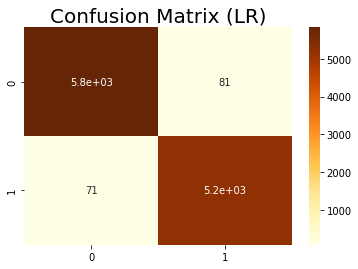

In [80]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap="YlOrBr", annot=True)
plt.title("Confusion Matrix (LR)", size=20)

###### Decision Tree: non-parametric superviced learning method 

In [81]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(XV_train, y_train)
print(DT.score(XV_test, y_test).round(2))
y_pred_DT = DT.predict(XV_test)
print(classification_report(y_test, y_pred_DT))  

0.99
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5913
           1       0.99      0.99      0.99      5307

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



Text(0.5, 1.0, 'Confusion Matrix (DT)')

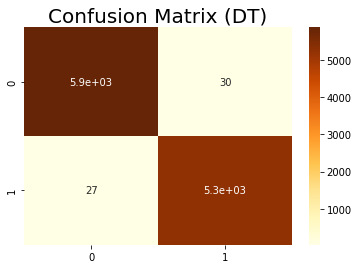

In [82]:
cm = confusion_matrix(y_test, y_pred_DT)
sns.heatmap(cm, cmap="YlOrBr", annot=True)
plt.title("Confusion Matrix (DT)", size=20)

###### Gradient Boosting: combining multiple weak models to create a strong one

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(XV_train, y_train)
print(GBC.score(XV_test, y_test).round(2))
y_pred_GBC = GBC.predict(XV_test)
print(classification_report(y_test, y_pred_GBC)) 

1.0
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5913
           1       0.99      1.00      1.00      5307

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



Text(0.5, 1.0, 'Confusion Matrix (GBC)')

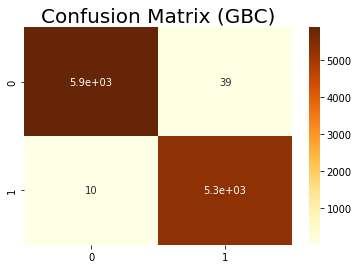

In [84]:
cm = confusion_matrix(y_test, y_pred_GBC)
sns.heatmap(cm, cmap="YlOrBr", annot=True)
plt.title("Confusion Matrix (GBC)", size=20)

###### Random Forest Classifier: superviced model for classification and regression and decision making

In [85]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(XV_train, y_train)
print(RFC.score(XV_test, y_test).round(2))
y_pred_RFC = RFC.predict(XV_test)
print(classification_report(y_test, y_pred_RFC)) 

0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5913
           1       0.99      0.99      0.99      5307

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



Text(0.5, 1.0, 'Confusion Matrix (RFC)')

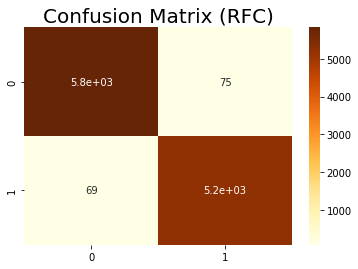

In [86]:
cm = confusion_matrix(y_test, y_pred_RFC)
sns.heatmap(cm, cmap="YlOrBr", annot=True)
plt.title("Confusion Matrix (RFC)", size=20)

### Testing the Algorithms

In [87]:
def output_label(n):
  return "Fake News" if (n == 0) else "Real News"

def testing(news):
  test_news = {"text":[news]}
  test_news = pd.DataFrame(test_news)
  test_news["text"] = test_news["text"].apply(filter_text)
  test_news = test_news["text"]
  test_news = text_vector.transform(test_news)
  print(f"LR Prediction: {output_label(LR.predict(test_news))}")
  print(f"DT Prediction: {output_label(DT.predict(test_news))}")
  print(f"GBC Prediction: {output_label(GBC.predict(test_news))}")
  print(f"RFC Prediction: {output_label(RFC.predict(test_news))}")

In [ ]:
news = str(input())
testing(news)

###### credits: https://www.youtube.com/watch?v=tBDj_21L618